In [2]:
filename = "crawldata/en-mk.deduped.txt"

import pandas as pd
df = pd.read_csv(filename, sep="\t",
             nrows=1200000,
             error_bad_lines=False,
             warn_bad_lines=False
).iloc[:, [0,2]]

df.columns=["url", "text"]


s = df.groupby("url")["text"].apply(" ".join)

from utils import get_lexicon, get_variant, count_variants

lex =get_lexicon()
lex_balanced = get_lexicon(balanced=True)

df = pd.DataFrame(s)
df["variant"] = df.text.apply(lambda s: get_variant(s, lex=lex))
df["variant_balanced"] = df.text.apply(lambda s: get_variant(s, lex=lex_balanced))



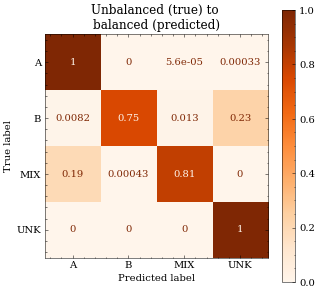

In [8]:
import matplotlib.pyplot as plt

plt.style.use("science,no-latex".split(","))

fig, ax = plt.subplots(figsize=(5,5))
from sklearn.metrics import ConfusionMatrixDisplay


display = ConfusionMatrixDisplay.from_predictions(df.variant, df.variant_balanced, labels=["A", "B", "MIX", "UNK"], cmap="Oranges", ax=ax, normalize="true")

ax.set_title("Unbalanced (true) to \nbalanced (predicted)")
plt.savefig("images/10_balun_cm.png", dpi=100)
plt.show()


In [7]:
from collections import Counter

print("Unbalanced: ", Counter(list(lex.values())))


from collections import Counter


print("Balanced: ", Counter(list(lex_balanced.values())))

Unbalanced:  Counter({'B': 4410, 'A': 1697})
Balanced:  Counter({'A': 1676, 'B': 1658})
